### Outliers

- Mean and Standard deviation (3 standard deviation away from the mean)
- IQR (interquartile range)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cardio = pd.read_csv('data/cardio_base.csv')

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [3]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [4]:
cardio.set_index('id', inplace=True)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
0,18393,2,168,62.0,110,80,1,0
1,20228,1,156,85.0,140,90,3,0
2,18857,1,165,64.0,130,70,3,0
3,17623,2,169,82.0,150,100,1,0
4,17474,1,156,56.0,100,60,1,0


In [5]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


### Preprocess the `age` column.

In [6]:
#divide by 365 days
cardio['age'] = cardio['age']/365
#round to whole number
cardio['age'] = round(cardio['age'], 0)
#convert from float to int datatype
cardio['age'] = cardio['age'].astype('int')
#view the data
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
0,50,2,168,62.0,110,80,1,0
1,55,1,156,85.0,140,90,3,0
2,52,1,165,64.0,130,70,3,0
3,48,2,169,82.0,150,100,1,0
4,48,1,156,56.0,100,60,1,0


### using the 3 standard deviation away from the mean.

In [7]:
cardio[cardio['age'] > cardio['age'].mean() + 3*cardio['age'].std()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,


(array([1.63265306e-05, 0.00000000e+00, 1.26897959e-02, 1.66530612e-02,
        2.98081633e-02, 3.88571429e-02, 5.73306122e-02, 3.66571429e-02,
        5.60938776e-02, 3.76081633e-02]),
 array([30. , 33.5, 37. , 40.5, 44. , 47.5, 51. , 54.5, 58. , 61.5, 65. ]),
 <BarContainer object of 10 artists>)

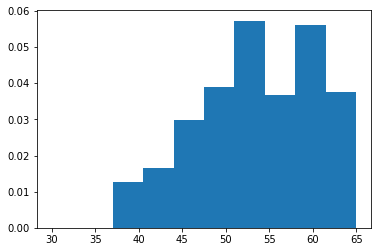

In [8]:
plt.hist(cardio['age'], density = True)

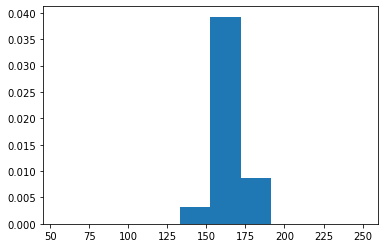

In [9]:
import matplotlib.pyplot as plt
plt.hist(cardio['height'], density = True)
plt.show()

In [10]:
df1 = cardio[cardio['height'] <= cardio['height'].mean() + 3*cardio['height'].std()]
df1.shape

(69859, 8)

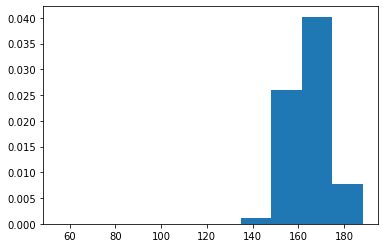

In [11]:
plt.hist(df1['height'], density = True)
plt.show()

In [12]:
df2 = df1[df1['weight'] <= df1['weight'].mean() + 3*df1['weight'].std()]

In [13]:
df2.shape

(69178, 8)

(array([2.70195565e-06, 1.21588004e-05, 2.28315252e-04, 2.87758277e-03,
        1.75924332e-02, 3.28841512e-02, 2.10117581e-02, 1.25208625e-02,
        4.74058119e-03, 1.58739894e-03]),
 array([ 10. ,  20.7,  31.4,  42.1,  52.8,  63.5,  74.2,  84.9,  95.6,
        106.3, 117. ]),
 <BarContainer object of 10 artists>)

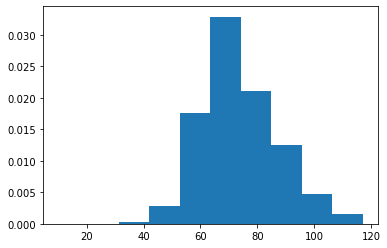

In [14]:
plt.hist(df2['weight'], density = True)

In [15]:
df3 = df2[df2['ap_hi'] <= df2['ap_hi'].mean() + 3*df2['ap_hi'].std()]

(array([1.83745650e-06, 0.00000000e+00, 4.46239435e-05, 7.61231978e-06,
        1.07118464e-02, 7.29995217e-03, 8.05855921e-05, 1.83745650e-06,
        2.62493785e-07, 2.62493785e-07]),
 array([-150. ,  -94.9,  -39.8,   15.3,   70.4,  125.5,  180.6,  235.7,
         290.8,  345.9,  401. ]),
 <BarContainer object of 10 artists>)

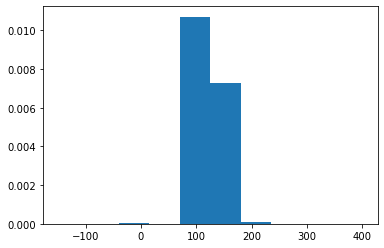

In [16]:
plt.hist(df3['ap_hi'], density = True)

In [17]:
df4 = df3[df3['ap_lo'] <= df3['ap_lo'].mean() + 3*df3['ap_lo'].std()]

(array([2.18135012e-07, 6.34336615e-04, 1.42326551e-02, 1.33062357e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.36270024e-07]),
 array([-70. ,  -2.8,  64.4, 131.6, 198.8, 266. , 333.2, 400.4, 467.6,
        534.8, 602. ]),
 <BarContainer object of 10 artists>)

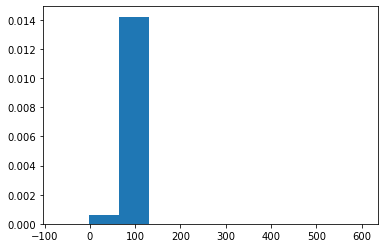

In [18]:
plt.hist(df4['ap_lo'], density = True)

In [19]:
df4[df4['cholesterol'] > df4['cholesterol'].mean() + 3*df4['cholesterol'].std()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,


In [20]:
df4.to_csv('data/data_without_outlier.csv', index=False)

In [21]:
data = pd.read_csv('data/data_without_outlier.csv')

data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,50,2,168,62.0,110,80,1,0
1,55,1,156,85.0,140,90,3,0
2,52,1,165,64.0,130,70,3,0
3,48,2,169,82.0,150,100,1,0
4,48,1,156,56.0,100,60,1,0


In [22]:
data.shape

(68219, 8)

In [23]:
cardio.shape

(70000, 8)

In [24]:
cardio.shape[0] - data.shape[0]

1781

### Interquartile Range

$IQR = Q3 - Q1$

In [25]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
0,50,2,168,62.0,110,80,1,0
1,55,1,156,85.0,140,90,3,0
2,52,1,165,64.0,130,70,3,0
3,48,2,169,82.0,150,100,1,0
4,48,1,156,56.0,100,60,1,0


In [26]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [27]:
Q1 = cardio['age'].quantile(0.25)
Q1

48.0

In [28]:
Q3 = cardio['age'].quantile(0.75)
Q3

58.0

In [29]:
IQR = Q3 - Q1 
IQR

10.0

$lowerLimit = Q1 - 1.5*IQR$

$upperLimit = Q3 +1.5*IQR$

In [30]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [31]:
lower_limit, upper_limit

(33.0, 73.0)

In [32]:
cardio[(cardio['age'] > upper_limit) | (cardio['age'] < lower_limit)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
8850,30,1,175,59.0,120,80,1,0
31922,30,2,175,92.0,100,60,1,0
43842,30,1,159,59.0,120,80,1,0
79749,30,1,160,59.0,110,70,1,0


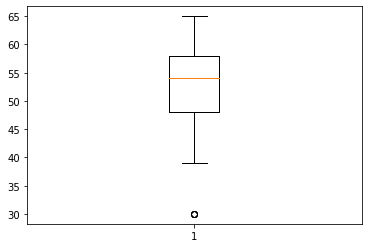

In [33]:
plt.boxplot(cardio['age'])
plt.show()

In [34]:
#removing outliers
data_1= cardio[(cardio['age'] > upper_limit) | (cardio['age'] > lower_limit)]

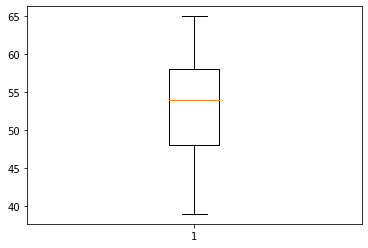

In [35]:
plt.boxplot(data_1['age'])
plt.show()

In [36]:
data_1.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000
mean,53.340019,1.349577,164.359063,74.206087,128.818218,96.631793,1.366892,0.088134
std,6.763186,0.476840,8.210122,14.395667,154.015758,188.477817,0.680264,0.283491
min,39.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [37]:
Q1 = data_1['height'].quantile(0.25)
Q3 = data_1['height'].quantile(0.75)
Q1, Q3

(159.0, 170.0)

In [38]:
IQ3 = Q3 - Q1
IQ3

11.0

In [39]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(144.0, 185.0)

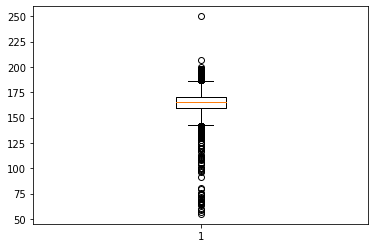

In [40]:
plt.boxplot(data_1['height'])
plt.show()

In [41]:
data_1[(data_1['height'] > upper_limit) | (data_1['height'] < lower_limit)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
81,56,2,187,115.0,130,90,1,0
105,56,2,188,105.0,120,80,1,0
309,60,2,76,55.0,120,80,1,0
343,50,1,142,61.0,120,80,1,0
618,46,1,186,200.0,130,70,1,0
...,...,...,...,...,...,...,...,...
99452,44,2,186,79.0,130,80,3,0
99673,48,1,141,44.0,100,70,1,0
99799,54,2,188,108.0,130,80,2,0


In [42]:
data_1.shape

(69996, 8)

In [43]:
69996 - 674

69322

In [44]:
data_2 = data_1[(data_1['height'] <= upper_limit) & (data_1['height'] >= lower_limit)]

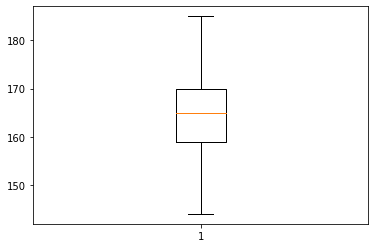

In [45]:
plt.boxplot(data_2['height'])
plt.show()

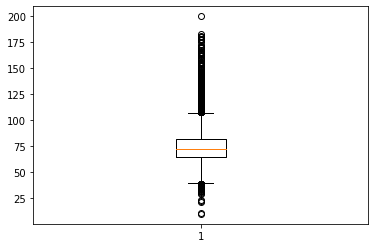

In [46]:
plt.boxplot(data_2['weight'])
plt.show()

In [47]:
Q1 = data_2['weight'].quantile(0.25)
Q3 = data_2['weight'].quantile(0.75)
Q1, Q3

(65.0, 82.0)

In [48]:
IQR = Q3 - Q1
IQR

17.0

In [49]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(39.5, 107.5)

In [50]:
#detect outliers
data_2[(data_2['weight'] > upper_limit) | (data_2['weight'] < lower_limit)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
24,46,2,172,112.0,120,80,1,0
114,54,1,152,110.0,160,90,1,0
267,62,1,176,108.0,140,90,1,0
366,48,1,165,115.0,150,100,1,0
390,62,2,170,115.0,120,80,2,0
...,...,...,...,...,...,...,...,...
99562,59,1,144,115.0,140,90,1,0
99925,58,1,164,115.0,130,80,1,0
99930,64,2,172,113.0,110,80,1,0


In [51]:
#remove outliers
data_3 = data_2[(data_2['weight'] <= upper_limit) & (data_2['weight'] >= lower_limit)]
data_3.shape

(67586, 8)

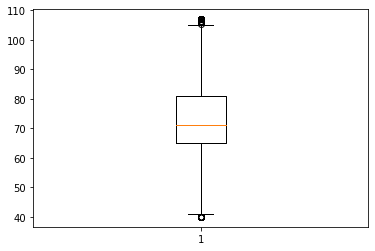

In [52]:
plt.boxplot(data_3['weight'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf2a6edd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf1adfd2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf2a6eda30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf1adfd880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf1adfdb50>],
 'means': []}

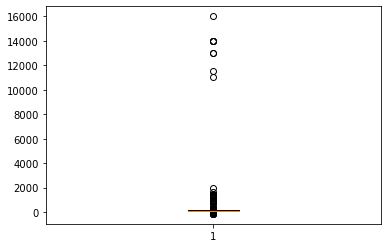

In [53]:
plt.boxplot(data_3['ap_hi'])

In [54]:
Q1 = data_3['ap_hi'].quantile(0.25)
Q3 = data_3['ap_hi'].quantile(0.75)
Q1, Q3

(120.0, 140.0)

In [55]:
IQR = Q3 - Q1
IQR

20.0

In [56]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(90.0, 170.0)

In [57]:
data_3[(data_3['ap_hi'] > upper_limit) | (data_3['ap_hi'] < lower_limit)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
74,56,1,164,64.0,180,90,1,1
79,57,2,165,75.0,180,90,3,0
136,51,1,167,80.0,190,90,2,0
288,50,2,172,62.0,80,70,1,0
318,64,2,175,75.0,180,100,3,1
...,...,...,...,...,...,...,...,...
99398,64,1,169,101.0,180,110,1,0
99405,46,2,179,93.0,180,100,1,0
99734,62,2,163,67.0,180,100,2,0


In [58]:
data_4 = data_3[(data_3['ap_hi'] <= upper_limit) & (data_3['ap_hi'] >= lower_limit)]

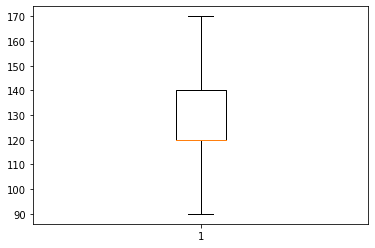

In [59]:
plt.boxplot(data_4['ap_hi'])
plt.show()

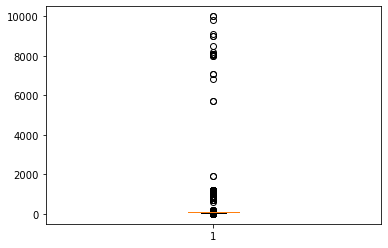

In [60]:
plt.boxplot(data_4['ap_lo'])
plt.show()

In [61]:
Q1 = data_4['ap_lo'].quantile(0.25)
Q3 = data_4['ap_lo'].quantile(0.75)
Q1, Q3

(80.0, 90.0)

In [62]:
IQR = Q3 - Q1
IQR

10.0

In [63]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(65.0, 105.0)

In [64]:
data_4[(data_4['ap_lo'] > upper_limit) | (data_4['ap_lo'] < lower_limit)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
4,48,1,156,56.0,100,60,1,0
14,54,1,164,68.0,110,60,1,0
33,64,2,156,45.0,110,60,1,0
58,56,2,159,63.0,120,60,1,0
65,50,1,160,75.0,100,60,1,0
...,...,...,...,...,...,...,...,...
99891,54,1,164,85.0,165,110,3,0
99897,42,2,171,67.0,110,60,1,0
99908,40,1,160,53.0,90,60,1,0


In [65]:
data_5 = data_4[(data_4['ap_lo'] <= upper_limit) & (data_4['ap_lo'] >= lower_limit)]
data_5.shape

(62386, 8)

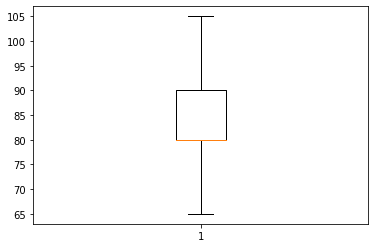

In [66]:
plt.boxplot(data_5['ap_lo'])
plt.show()

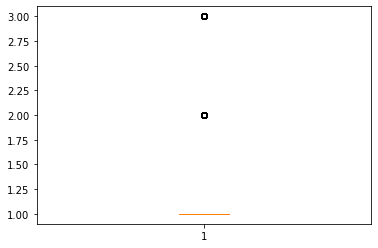

In [67]:
plt.boxplot(data_5['cholesterol'])
plt.show()

In [68]:
Q1 = data_5['cholesterol'].quantile(0.25)
Q3 = data_5['cholesterol'].quantile(0.75)
Q1, Q3

(1.0, 1.0)

In [69]:
data_5.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,62386.000000,62386.000000,62386.000000,62386.000000,62386.000000,62386.000000,62386.000000,62386.000000
mean,53.408185,1.348027,164.391482,73.171166,126.417385,81.696326,1.357596,0.086253
std,6.740211,0.476348,7.480949,12.263648,14.289903,7.673183,0.675109,0.280740
min,39.000000,1.000000,144.000000,40.000000,90.000000,65.000000,1.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,0.000000
max,65.000000,2.000000,185.000000,107.000000,170.000000,105.000000,3.000000,1.000000


In [70]:
IQR = Q3 - Q1
IQR

0.0

In [71]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(1.0, 1.0)

In [72]:
data_5[(data_5['cholesterol'] > upper_limit) | (data_5['cholesterol'] < lower_limit)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,,,,,,,,
1,55,1,156,85.0,140,90,3,0
2,52,1,165,64.0,130,70,3,0
8,60,1,151,67.0,120,80,2,0
9,61,1,157,93.0,130,80,3,0
12,62,2,178,95.0,130,90,3,0
...,...,...,...,...,...,...,...,...
99958,62,2,173,103.0,140,80,3,1
99964,59,1,163,65.0,120,80,2,0
99969,61,1,163,74.0,160,100,2,0


In [73]:
data_6 = data_5[(data_5['cholesterol'] <= upper_limit) | (data_5['cholesterol'] < lower_limit)]
data_6.shape

(47128, 8)

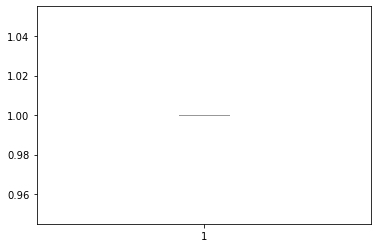

In [74]:
plt.boxplot(data_6['cholesterol'])
plt.show()

### Export the data without outliers


In [75]:
data_6.to_csv("data/data_without_outliers_IQR.csv", index=False)

In [76]:
cleaned_data1 = pd.read_csv('data/data_without_outlier.csv')

cleaned_data2 = pd.read_csv('data/data_without_outliers_IQR.csv')

cleaned_data1.shape, cleaned_data2.shape

((68219, 8), (47128, 8))